In [1]:
import pandas as pd
import requests
import os
from tqdm import tqdm
from PIL import Image
from io import BytesIO

# Load train data
df_train = pd.read_csv('/kaggle/input/fakeddit-dataset/multimodal_only_samples/multimodal_train.tsv', sep='\t')

# Create images folder
os.makedirs('images/train', exist_ok=True)

# Download function
def download_image(url, save_path):
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            img.save(save_path)
            return True
    except:
        pass
    return False

# Download for subset (e.g., first 10000)
for idx, row in tqdm(df_train.iloc[:10000].iterrows(), total=10000):
    img_url = row['image_url']
    img_id = row['id']  # Use ID as filename
    save_path = f'images/train/{img_id}.jpg'
    if not os.path.exists(save_path):
        download_image(img_url, save_path)

100%|██████████| 10000/10000 [05:17<00:00, 31.47it/s]


In [2]:
# Load validate data
df_validate = pd.read_csv('/kaggle/input/fakeddit-dataset/multimodal_only_samples/multimodal_validate.tsv', sep='\t')
# Create images folder
os.makedirs('images/validate', exist_ok=True)

# Download function
def download_image(url, save_path):
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            img.save(save_path)
            return True
    except:
        pass
    return False

# Download for subset (e.g., first 10000)
for idx, row in tqdm(df_validate.iloc[:10000].iterrows(), total=10000):
    img_url = row['image_url']
    img_id = row['id']  # Use ID as filename
    save_path = f'images/validate/{img_id}.jpg'
    if not os.path.exists(save_path):
        download_image(img_url, save_path)

100%|██████████| 10000/10000 [09:35<00:00, 17.37it/s]


In [3]:
# Load test data
df_test = pd.read_csv('/kaggle/input/fakeddit-dataset/multimodal_only_samples/multimodal_test_public.tsv', sep='\t')
# Create images folder
os.makedirs('images/test', exist_ok=True)

# Download function
def download_image(url, save_path):
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            img.save(save_path)
            return True
    except:
        pass
    return False

# Download for subset (e.g., first 10000)
for idx, row in tqdm(df_test.iloc[:10000].iterrows(), total=10000):
    img_url = row['image_url']
    img_id = row['id']  # Use ID as filename
    save_path = f'images/test/{img_id}.jpg'
    if not os.path.exists(save_path):
        download_image(img_url, save_path)

100%|██████████| 10000/10000 [10:09<00:00, 16.42it/s]


**Load and Explore the Data**

In [4]:
import matplotlib.pyplot as plt

# Load datasets
train_df = pd.read_csv('/kaggle/input/fakeddit-dataset/multimodal_only_samples/multimodal_train.tsv', sep='\t')
val_df = pd.read_csv('/kaggle/input/fakeddit-dataset/multimodal_only_samples/multimodal_validate.tsv', sep='\t')
test_df = pd.read_csv('/kaggle/input/fakeddit-dataset/multimodal_only_samples/multimodal_test_public.tsv', sep='\t')

In [5]:
# Dictionary mapping 6_way_label to descriptions
label_descriptions = {
    0: "True (authentic content)",
    1: "Satire/Parody (humorous or exaggerated, not meant to deceive)",
    2: "Misleading Content (distorts facts but not outright false)",
    3: "Imposter Content (uses fake identities or sources)",
    4: "False Connection (image or headline misaligned with content)",
    5: "Manipulated Content (altered images or text to deceive)"
}

# Print descriptions
for label, desc in label_descriptions.items():
    print(f"Label {label}: {desc}")

Label 0: True (authentic content)
Label 1: Satire/Parody (humorous or exaggerated, not meant to deceive)
Label 2: Misleading Content (distorts facts but not outright false)
Label 3: Imposter Content (uses fake identities or sources)
Label 4: False Connection (image or headline misaligned with content)
Label 5: Manipulated Content (altered images or text to deceive)


In [6]:
train_df.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,VIDCAs17,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,True,98pbid,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,NaN,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,2,2
2,prometheus1123,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
3,NaN,puppy taking in the view,1.471341e+09,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1,0,0
4,3rikR3ith,i found a face in my sheet music too,1.525318e+09,i.redd.it,True,8gnet9,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,NaN,2.0,13,pareidolia,I found a face in my sheet music too!,0.84,0,2,2


Train shape: (564000, 16)
Validation shape: (59342, 16)
Test shape: (59319, 16)

Columns: Index(['author', 'clean_title', 'created_utc', 'domain', 'hasImage', 'id',
       'image_url', 'linked_submission_id', 'num_comments', 'score',
       'subreddit', 'title', 'upvote_ratio', '2_way_label', '3_way_label',
       '6_way_label'],
      dtype='object')

6-way label distribution (Train):
6_way_label
0    0.393761
4    0.297619
2    0.190108
1    0.059363
5    0.038255
3    0.020894
Name: proportion, dtype: float64


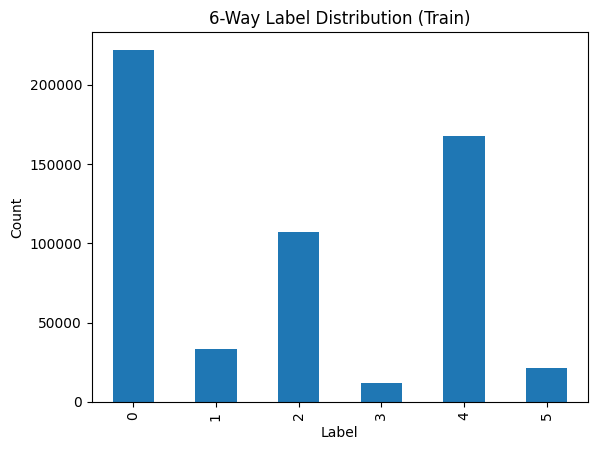


Sample data:
                                         clean_title  \
0  my walgreens offbrand mucinex was engraved wit...   
1                this concerned sink with a tiny hat   
2      hackers leak emails from uae ambassador to us   
3                           puppy taking in the view   
4               i found a face in my sheet music too   

                                           image_url  6_way_label  
0  https://external-preview.redd.it/WylDbZrnbvZdB...            0  
1  https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...            2  
2  https://external-preview.redd.it/6fNhdbc6K1vFA...            0  
3  https://external-preview.redd.it/HLtVNhTR6wtYt...            0  
4  https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...            2  


In [7]:
# Basic stats
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)
print("\nColumns:", train_df.columns)
print("\n6-way label distribution (Train):")
print(train_df['6_way_label'].value_counts(normalize=True))

# Plot label distribution
train_df['6_way_label'].value_counts().sort_index().plot(kind='bar', title='6-Way Label Distribution (Train)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Sample view
print("\nSample data:")
print(train_df[['clean_title', 'image_url', '6_way_label']].head())

# Handle missing values
train_df = train_df.dropna(subset=['clean_title', 'image_url'])
val_df = val_df.dropna(subset=['clean_title', 'image_url'])
test_df = test_df.dropna(subset=['clean_title', 'image_url'])

# Save cleaned datasets
train_df.to_csv('/kaggle/working/multimodal_train_cleaned.tsv', sep='\t', index=False)
val_df.to_csv('/kaggle/working/multimodal_validate_cleaned.tsv', sep='\t', index=False)
test_df.to_csv('/kaggle/working/multimodal_test_cleaned.tsv', sep='\t', index=False)

**valid images or not**

In [9]:
# Define image folders
folders = ['images/train', 'images/validate', 'images/test']

for folder in folders:
    valid_count = 0
    total_count = len([f for f in os.listdir(folder) if f.endswith(('.jpg', '.jpeg', '.png','webp'))])
    for filename in os.listdir(folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(folder, filename)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verify image integrity
                valid_count += 1
            except:
                print(f"Invalid image: {file_path}")
                # Optionally remove invalid image: os.remove(file_path)
    print(f"{folder}: Total images = {total_count}, Valid images = {valid_count}")

images/train: Total images = 6234, Valid images = 6234
images/validate: Total images = 6162, Valid images = 6162
images/test: Total images = 6217, Valid images = 6217


**Preprocessing the data**

In [10]:
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer
from torchvision import transforms
import torch


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class FakedditDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform or transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        text = row['clean_title']
        img_path = f"{self.img_dir}/{row['id']}.jpg"
        label = row['6_way_label']

        # Text
        encoding = tokenizer(text, truncation=True, padding='max_length', max_length=128, return_tensors='pt')
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        # Image
        try:
            img = Image.open(img_path).convert('RGB')
            img = self.transform(img)
        except:
            img = torch.zeros(3, 224, 224)

        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'img': img, 'label': label}

# Load cleaned datasets
train_df = pd.read_csv('/kaggle/working/multimodal_train_cleaned.tsv', sep='\t')
val_df = pd.read_csv('/kaggle/working/multimodal_validate_cleaned.tsv', sep='\t')
test_df = pd.read_csv('/kaggle/working/multimodal_test_cleaned.tsv', sep='\t')

# Create datasets (use subsets if needed)
train_dataset = FakedditDataset(train_df.iloc[:5000], 'images/train')
val_dataset = FakedditDataset(val_df.iloc[:5000], 'images/validate')
test_dataset = FakedditDataset(test_df.iloc[:5000], 'images/test')

# DataLoaders
batch_size = 20
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]


**Build the Multimodal Model**

In [11]:
import torch.nn as nn
from transformers import BertModel
from torchvision.models import resnet50

class MultimodalFakeNewsModel(nn.Module):
    def __init__(self, num_classes=6):
        super().__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.resnet = resnet50(pretrained=True)
        self.resnet.fc = nn.Identity()  # Remove final layer
        self.fc = nn.Sequential(
            nn.Linear(768 + 2048, 512),  # BERT hidden + ResNet features
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )

    def forward(self, input_ids, attention_mask, img):
        text_out = self.bert(input_ids, attention_mask=attention_mask).pooler_output
        img_out = self.resnet(img)
        combined = torch.cat((text_out, img_out), dim=1)
        return self.fc(combined)

model = MultimodalFakeNewsModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

2025-09-17 06:19:10.381214: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758089950.561293      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758089950.610925      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 225MB/s]


MultimodalFakeNewsModel(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, e

**Train the Model**

In [12]:
from torch.optim import Adam
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

optimizer = Adam(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()

def train_epoch(loader):
    model.train()
    total_loss = 0
    for batch in loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        img = batch['img'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, img)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(loader):
    model.eval()
    preds, true = [], []
    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            img = batch['img'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask, img)
            preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            true.extend(labels.cpu().numpy())
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, average='weighted')
    return acc, f1

# Train for 3-5 epochs
epochs = 6
for epoch in range(epochs):
    train_loss = train_epoch(train_loader)
    val_acc, val_f1 = evaluate(val_loader)
    print(f"Epoch {epoch+1}: Train Loss {train_loss:.4f}, Val Acc {val_acc:.4f}, Val F1 {val_f1:.4f}")

# Save model
torch.save(model.state_dict(), 'fake_news_model.pth')

Epoch 1: Train Loss 1.0486, Val Acc 0.6742, Val F1 0.5808
Epoch 2: Train Loss 0.7345, Val Acc 0.7532, Val F1 0.7280
Epoch 3: Train Loss 0.5174, Val Acc 0.7680, Val F1 0.7461
Epoch 4: Train Loss 0.3323, Val Acc 0.7664, Val F1 0.7508
Epoch 5: Train Loss 0.2227, Val Acc 0.7688, Val F1 0.7537
Epoch 6: Train Loss 0.1429, Val Acc 0.7742, Val F1 0.7618


**Evaluate and Test**

Test Accuracy: 0.7854
Test F1 Score: 0.7757


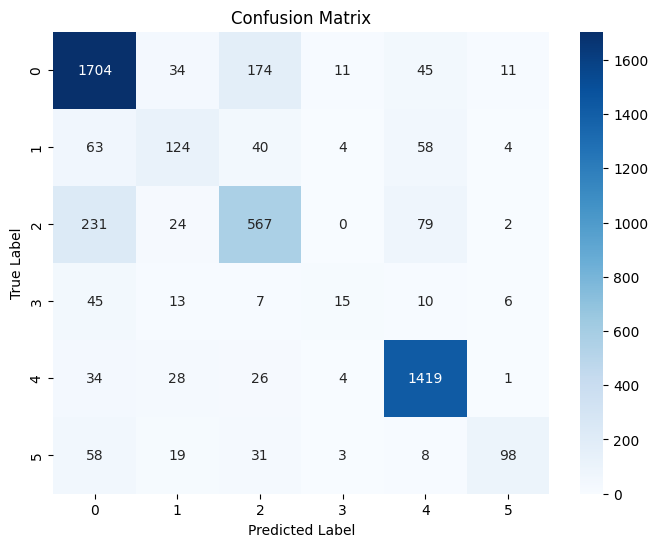

In [13]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_and_visualize(loader):
    model.eval()
    preds, true = [], []
    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            img = batch['img'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask, img)
            preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            true.extend(labels.cpu().numpy())

    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, average='weighted')
    cm = confusion_matrix(true, preds)

    print(f"Test Accuracy: {acc:.4f}")
    print(f"Test F1 Score: {f1:.4f}")

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(6), yticklabels=range(6))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Evaluate on test set
evaluate_and_visualize(test_loader)

**Deploy and Wrap Up**

In [14]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 81.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 115.6 MB/s eta 0:00:0000:01


In [ ]:
%%writefile app.py
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import streamlit as st
from PIL import Image
from torchvision import transforms
from transformers import BertTokenizer, BertModel
from torchvision.models import resnet50

# Define the MultimodalFakeNewsModel class
class MultimodalFakeNewsModel(nn.Module):
    def __init__(self, num_classes=6):
        super().__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.resnet = resnet50(pretrained=True)
        self.resnet.fc = nn.Identity()  # Remove final layer
        self.fc = nn.Sequential(
            nn.Linear(768 + 2048, 512),  # BERT hidden + ResNet features
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )

    def forward(self, input_ids, attention_mask, img):
        text_out = self.bert(input_ids, attention_mask=attention_mask).pooler_output
        img_out = self.resnet(img)  # Shape: (batch_size, 2048, 1, 1)
        img_out = img_out.squeeze(-1).squeeze(-1)  # Flatten to (batch_size, 2048)
        combined = torch.cat((text_out, img_out), dim=1)
        return self.fc(combined)

# Load the trained model
model = MultimodalFakeNewsModel()
model.load_state_dict(torch.load('fake_news_model.pth'))
model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define a simple dataset for prediction
class PredictionDataset(Dataset):
    def __init__(self, text, img_path, tokenizer, transform):
        self.text = text
        self.img_path = img_path
        self.tokenizer = tokenizer
        self.transform = transform

    def __len__(self):
        return 1

    def __getitem__(self, idx):
        encoding = self.tokenizer(self.text, truncation=True, padding='max_length', max_length=128, return_tensors='pt')
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        try:
            img = Image.open(self.img_path).convert('RGB')
            img = self.transform(img)
        except:
            img = torch.zeros(3, 224, 224)

        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'img': img}

# Streamlit app
st.title("Fake News Detector")
st.write("Upload an image and enter the title to check if it's fake news.")

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png","webp"])
title = st.text_input("Enter the title...")

if st.button("Predict"):
    if uploaded_file is not None and title:
        # Save uploaded image temporarily
        img_path = "temp_image.jpg"
        with open(img_path, "wb") as f:
            f.write(uploaded_file.getbuffer())

        # Prepare data
        transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        dataset = PredictionDataset(title, img_path, tokenizer, transform)
        loader = DataLoader(dataset, batch_size=1)

        # Predict
        with torch.no_grad():
            for batch in loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                img = batch['img'].to(device)
                outputs = model(input_ids, attention_mask, img)
                pred = torch.argmax(outputs, dim=1).item()

        # Label descriptions
        labels = {
            0: "True (authentic content)",
            1: "Satire/Parody (humorous or exaggerated, not meant to deceive)",
            2: "Misleading Content (distorts facts but not outright false)",
            3: "Imposter Content (uses fake identities or sources)",
            4: "False Connection (image or headline misaligned with content)",
            5: "Manipulated Content (altered images or text to deceive)"
        }
        st.write(f"Prediction: {labels[pred]}")

        # Clean up
        import os
        os.remove(img_path)

In [15]:
!pip install beautifulsoup4 requests streamlit torch torchvision transformers pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.

In [22]:
%%writefile /kaggle/working/app.py

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import streamlit as st
from PIL import Image
from torchvision import transforms
from transformers import BertTokenizer, BertModel
from torchvision.models import resnet50
import os
import requests
from io import BytesIO
from bs4 import BeautifulSoup  # For web scraping

# Define the MultimodalFakeNewsModel class
class MultimodalFakeNewsModel(nn.Module):
    def __init__(self, num_classes=6):
        super().__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.resnet = resnet50(pretrained=True)
        self.resnet.fc = nn.Identity()  # Remove final layer
        self.fc = nn.Sequential(
            nn.Linear(768 + 2048, 512),  # BERT hidden + ResNet features
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )

    def forward(self, input_ids, attention_mask, img):
        text_out = self.bert(input_ids, attention_mask=attention_mask).pooler_output
        img_out = self.resnet(img)  # Shape: (batch_size, 2048, 1, 1)
        img_out = img_out.squeeze(-1).squeeze(-1)  # Flatten to (batch_size, 2048)
        combined = torch.cat((text_out, img_out), dim=1)
        return self.fc(combined)

# Load the trained model
model = MultimodalFakeNewsModel()
model.load_state_dict(torch.load('fake_news_model.pth'))
model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define a simple dataset for prediction
class PredictionDataset(Dataset):
    def __init__(self, text, img, tokenizer, transform):
        self.text = text
        self.img = img
        self.tokenizer = tokenizer
        self.transform = transform

    def __len__(self):
        return 1

    def __getitem__(self, idx):
        encoding = self.tokenizer(self.text, truncation=True, padding='max_length', max_length=128, return_tensors='pt')
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()
        img = self.transform(self.img)
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'img': img}

# Shared prediction function
def predict(text, img_bytes):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    try:
        img = Image.open(BytesIO(img_bytes)).convert('RGB')
    except:
        st.error("Invalid image fetched.")
        return None
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    dataset = PredictionDataset(text, img, tokenizer, transform)
    loader = DataLoader(dataset, batch_size=1)

    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            img = batch['img'].to(device)
            outputs = model(input_ids, attention_mask, img)
            pred = torch.argmax(outputs, dim=1).item()

    labels = {
        0: "True (authentic content)",
        1: "Satire/Parody (humorous or exaggerated, not meant to deceive)",
        2: "Misleading Content (distorts facts but not outright false)",
        3: "Imposter Content (uses fake identities or sources)",
        4: "False Connection (image or headline misaligned with content)",
        5: "Manipulated Content (altered images or text to deceive)"
    }
    return labels[pred]

# Streamlit app with new feature
st.title("Fake News Detector")
st.write("Option 1: Upload image and enter title manually, or Option 2: Enter a news URL for auto-fetch.")

# Option 1: Manual Upload
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png","webp"])
title = st.text_input("Enter the title...")
if st.button("Predict (Manual)"):
    if uploaded_file and title:
        img_bytes = uploaded_file.getvalue()
        prediction = predict(title, img_bytes)
        if prediction:
            st.write(f"Prediction: {prediction}")

# Option 2: Fetch from URL
url = st.text_input("Option 2: Enter a news URL (e.g., https://example.com/article)...")
if st.button("Fetch and Predict"):
    if url:
        try:
            # Fetch webpage
            response = requests.get(url, timeout=10)
            soup = BeautifulSoup(response.text, 'html.parser')
            
            # Extract title (from <title> or <h1>)
            fetched_title = soup.title.string if soup.title else soup.find('h1').text if soup.find('h1') else "No title found"
            
            # Extract main image (from <meta property="og:image"> or first <img>)
            img_url = soup.find('meta', property='og:image')['content'] if soup.find('meta', property='og:image') else None
            if not img_url:
                img_tag = soup.find('img')
                img_url = img_tag['src'] if img_tag else None
            
            if not img_url:
                st.error("No image found on the page.")
                st.stop()  # Stop execution instead of return
            
            # Download image
            img_response = requests.get(img_url, timeout=10)
            img_bytes = img_response.content
            
            # Predict
            prediction = predict(fetched_title, img_bytes)
            if prediction:
                st.write(f"Fetched Title: {fetched_title}")
                st.image(img_bytes, caption="Fetched Image")
                st.write(f"Prediction: {prediction}")
        except Exception as e:
            st.error(f"Error fetching from URL: {str(e)}")

Overwriting /kaggle/working/app.py


In [24]:
!pkill -f streamlit

In [25]:
!pip install streamlit pyngrok torch torchvision transformers==4.44.2 beautifulsoup4 requests

In [20]:
!pip install pyngrok

In [26]:
from pyngrok import ngrok
import subprocess
import time

# Replace with your ngrok authtoken
NGROK_AUTH_TOKEN = "31eia6HbVOxqtVySEH43gQJx012_4S8ZVxUfzkBXz3XF5vvMQ"  # Get from ngrok.com
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Start Streamlit in a subprocess (non-background)
process = subprocess.Popen(['streamlit', 'run', 'app.py'])

# Wait briefly for Streamlit to start
time.sleep(5)

# Create a public URL with ngrok
public_url = ngrok.connect(8501)
print("Streamlit URL:", public_url)




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.19.2.2:8501
  External URL: http://34.168.175.55:8501

Streamlit URL: NgrokTunnel: "https://14617e11b5df.ngrok-free.app" -> "http://localhost:8501"


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  wa